In [3]:
                                                                                                                                            #Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.rcParams['axes.labelsize'] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
train = pd.read_csv('C:\\Users\\DIRECTOR\\Desktop\\financial-inclusion-in-africa\\Train.csv')
test = pd.read_csv('C:\\Users\\DIRECTOR\\Desktop\\financial-inclusion-in-africa\\Test.csv')
ss = pd.read_csv('C:\\Users\\DIRECTOR\\Desktop\\financial-inclusion-in-africa\\SampleSubmission.csv')
variable = pd.read_csv('C:\\Users\\DIRECTOR\\Desktop\\financial-inclusion-in-africa\\Train.csv')

In [6]:
print('Train data shape:', train.shape)
print('Test data shape:', test.shape)

Train data shape: (23524, 13)
Test data shape: (10086, 12)


In [7]:
list(train.columns) #Showing list of columns in train data

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [9]:
train.head() #Inspecting train data, the head() method display the first five data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
train.tail() #Inspecting the train data, the tail() method display the last five data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [11]:
print('Missing values:', train.isnull()) #Checking missing values

Missing values:        country   year  uniqueid  bank_account  location_type  \
0        False  False     False         False          False   
1        False  False     False         False          False   
2        False  False     False         False          False   
3        False  False     False         False          False   
4        False  False     False         False          False   
...        ...    ...       ...           ...            ...   
23519    False  False     False         False          False   
23520    False  False     False         False          False   
23521    False  False     False         False          False   
23522    False  False     False         False          False   
23523    False  False     False         False          False   

       cellphone_access  household_size  age_of_respondent  \
0                 False           False              False   
1                 False           False              False   
2                 False      

In [12]:
print('Missing values:', train.isnull().sum()) #Checking missing values by specifying the total number of missing values for each column

Missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [13]:
print('Missing values:', train.isnull().sum().sum()) #Checking  the total missing values

Missing values: 0


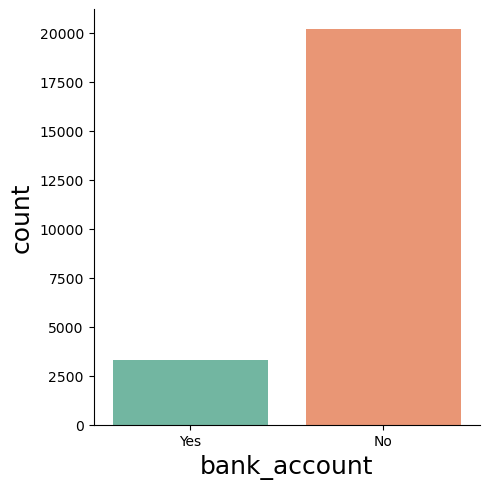

In [14]:
#Exploring target distribution
sns.catplot(x="bank_account", kind="count", data=train, palette="Set2")

In [15]:
ss.head() #Viewing the submission file

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [16]:
ss.tail()

,unique_id,bank_account
33605,uniqueid_2998 x Uganda,0
33606,uniqueid_2999 x Uganda,0
33607,uniqueid_3000 x Uganda,0
33608,uniqueid_3001 x Uganda,0
33609,uniqueid_3002 x Uganda,0


In [17]:
print(train.info()) #Training data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [18]:
variable #variable

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [20]:
variable.T #Transposing use variables

,0,1,2,3,4,5,6,7,8,9,...,23514,23515,23516,23517,23518,23519,23520,23521,23522,23523
country,Kenya,Kenya,Kenya,Kenya,Kenya,Kenya,Kenya,Kenya,Kenya,Kenya,...,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda,Uganda
year,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
uniqueid,uniqueid_1,uniqueid_2,uniqueid_3,uniqueid_4,uniqueid_5,uniqueid_6,uniqueid_7,uniqueid_8,uniqueid_9,uniqueid_10,...,uniqueid_2107,uniqueid_2108,uniqueid_2109,uniqueid_2110,uniqueid_2111,uniqueid_2113,uniqueid_2114,uniqueid_2115,uniqueid_2116,uniqueid_2117
bank_account,Yes,No,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
location_type,Rural,Rural,Urban,Rural,Urban,Rural,Rural,Rural,Rural,Urban,...,Urban,Rural,Urban,Urban,Rural,Rural,Rural,Rural,Urban,Rural
cellphone_access,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,...,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
household_size,3,5,5,5,8,7,7,1,3,3,...,6,6,3,9,9,4,2,5,7,10
age_of_respondent,24,70,26,34,26,26,32,42,54,76,...,24,16,35,16,20,48,27,27,30,20
gender_of_respondent,Female,Female,Male,Female,Male,Female,Female,Female,Male,Female,...,Female,Male,Male,Male,Female,Female,Female,Female,Female,Male
relationship_with_head,Spouse,Head of Household,Other relative,Head of Household,Child,Spouse,Spouse,Head of Household,Head of Household,Head of Household,...,Spouse,Parent,Head of Household,Parent,Child,Head of Household,Head of Household,Parent,Parent,Child


In [21]:
#Univariate analysis
train['bank_account'].value_counts() #Counting bank accounts

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

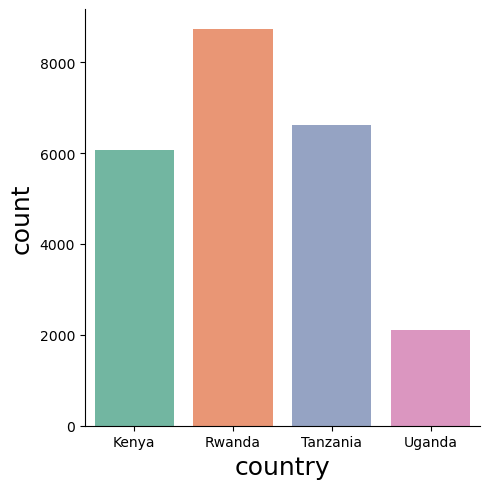

In [22]:
sns.catplot(x="country", kind="count", data=train, palette="Set2") #Country Distribution

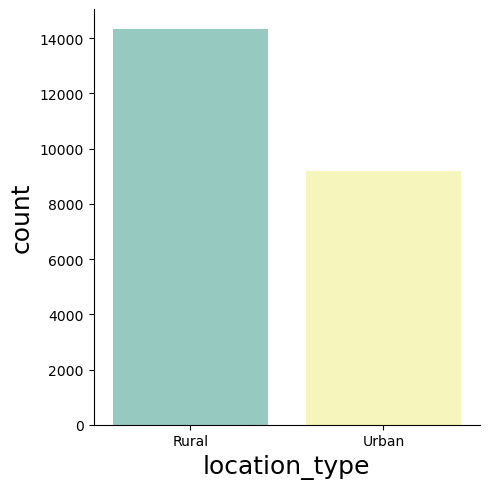

In [23]:
sns.catplot(x="location_type", kind="count", data=train, palette="Set3") #Location_type Distribution

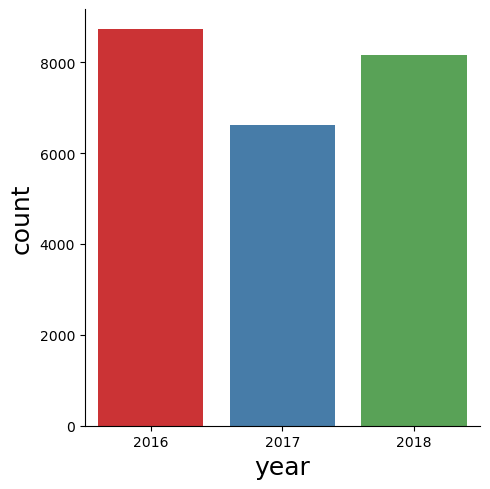

In [24]:
sns.catplot(x="year", kind="count", data=train, palette="Set1") #Year Distribution

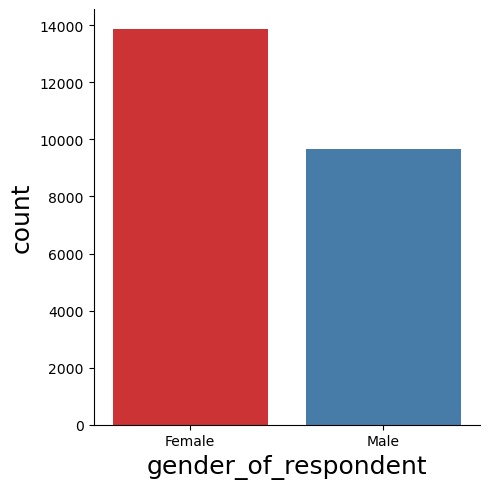

In [25]:
sns.catplot(x="gender_of_respondent", kind="count", data=train, palette="Set1") #Gender of respondents Distribution

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

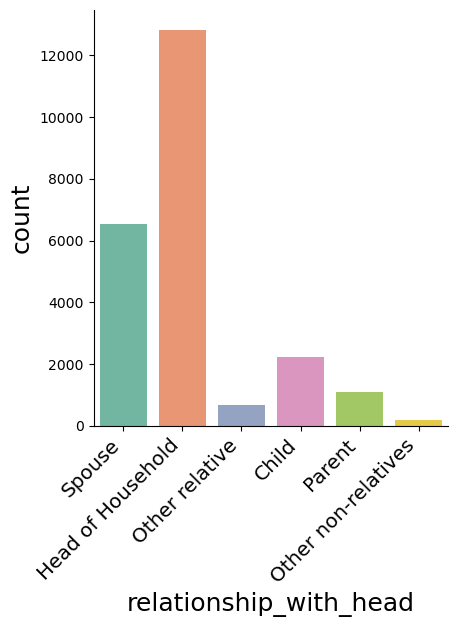

In [26]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="Set2") #Relationships Distribution
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontsize='x-large'
)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

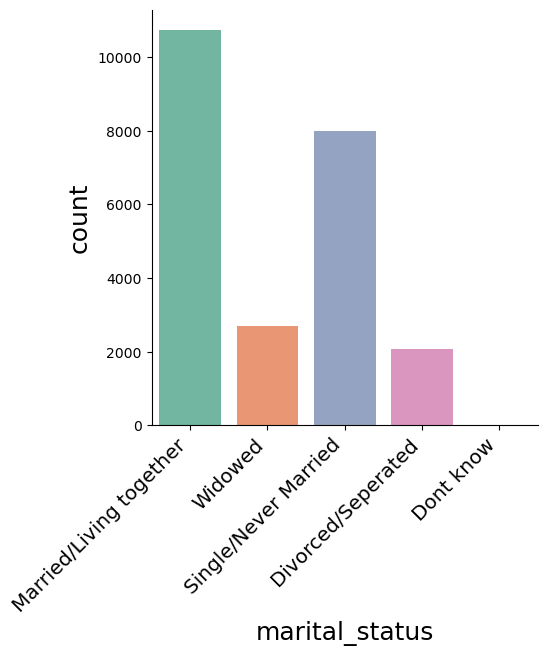

In [27]:
sns.catplot(x="marital_status", kind="count", data=train, palette="Set2") #Marital status Distribution
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontsize='x-large'
)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

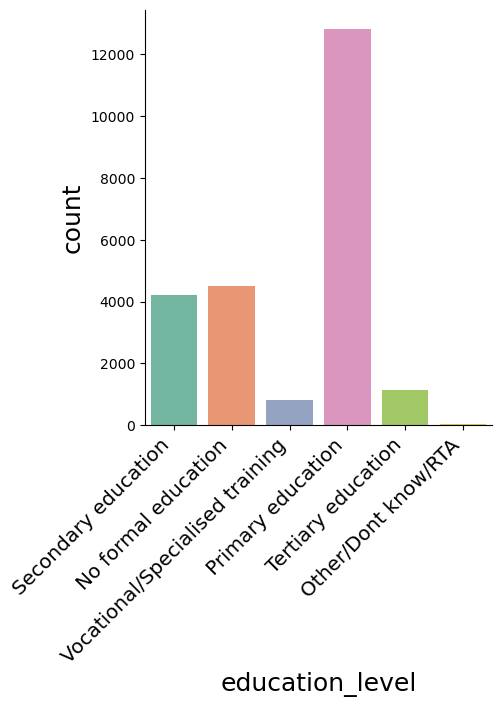

In [28]:
sns.catplot(x="education_level", kind="count", data=train, palette="Set2") #Education level Distribution
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontsize='x-large'
)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

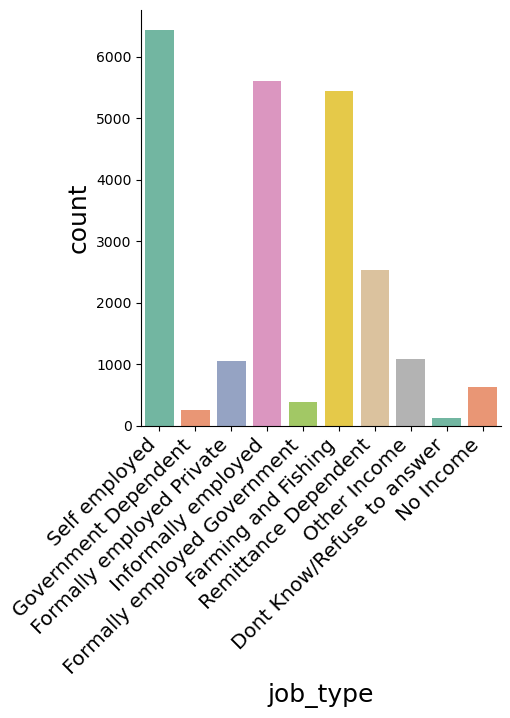

In [29]:
sns.catplot(x="job_type", kind="count", data=train, palette="Set2") #Job type Distribution
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontsize='x-large'
)

Text(0.5, 0, 'Household Size')

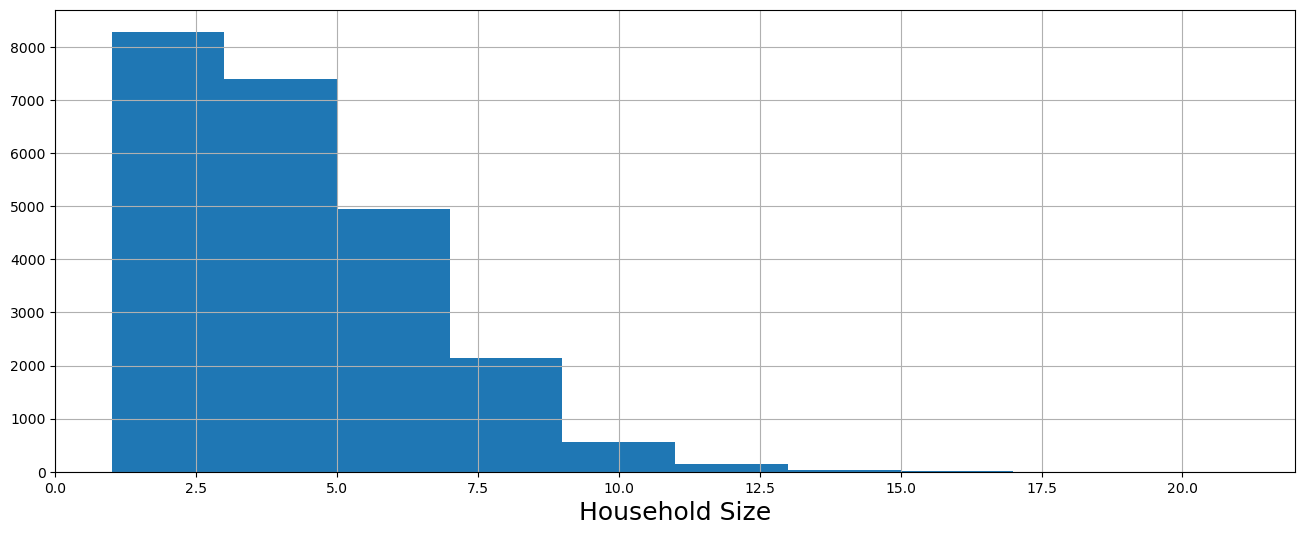

In [30]:
#Exploring Household size
plt.figure(figsize=(16,6))
train.household_size.hist()
plt.xlabel('Household Size')

<Figure size 1600x600 with 0 Axes>

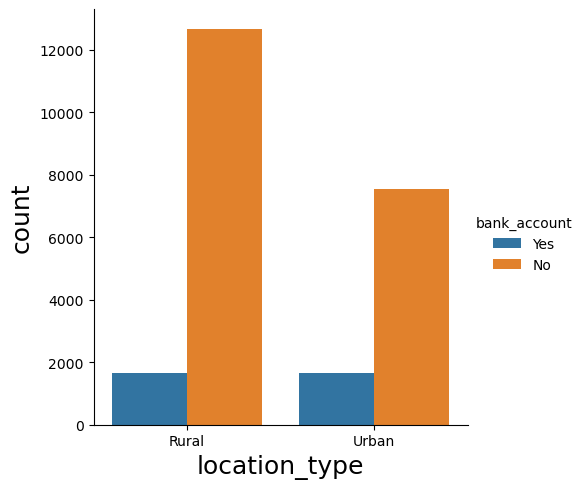

In [31]:
#Bivariate Analysis
plt.figure(figsize=(16,6))
sns.catplot(x="location_type", hue="bank_account", kind="count", data=train) #Location type

([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

<Figure size 1600x800 with 0 Axes>

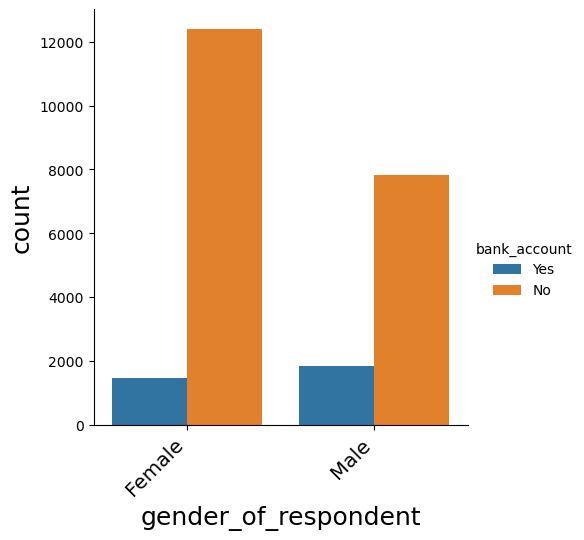

In [32]:
plt.figure(figsize=(16,8))
sns.catplot(x="gender_of_respondent", hue="bank_account", kind="count", data=train) #gender of respondents
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontsize='x-large'
)

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

<Figure size 1600x800 with 0 Axes>

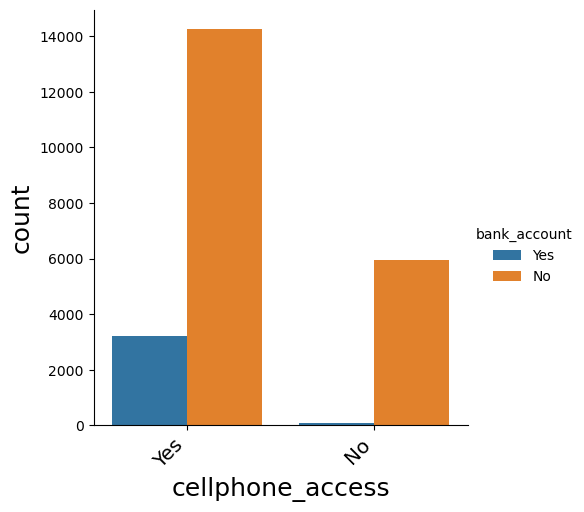

In [33]:
plt.figure(figsize=(16,8))
sns.catplot(x="cellphone_access", hue="bank_account", kind="count", data=train) #cellphone access
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontsize='x-large'
)

In [34]:
#Importing preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Converting target label to numerical data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separating training features from target label
x_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']
print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [35]:
def preprocessing_data(data):
    #Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    #Categorical features to be converted to one Hot Encoding
    categ = ["relationship_with_head", "marital_status", "education_level", "job_type", "country"]
    
    #One Hot Encoding conversion ---> method that prepare algorithm for prediction by converting categorical into numerical values
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    #Label Encoder conversion ----> non_numerical to numerical
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access" ]= le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    #Drop uniqueid column
    data = data.drop(["uniqueid"], axis=1)

    #scale data into range of 0 and 1 
    scaler = MinMaxScaler(feature_range=(0,1)) #MinMaxScaler didn't deal with outliers
    data = scaler.fit_transform(data) #fit for training, fit_transform it transform or map data into the range of 0 to 1 then it train the model

    return data


In [36]:
#Preprocess the train data
processed_train = preprocessing_data(x_train)
processed_test = preprocessing_data(test)

Model Training 

In [37]:
import sklearn.model_selection

In [44]:
#Split train_data
from sklearn.model_selection import train_test_split

x_Train, x_val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, test_size = 30, random_state=42) #val (validation) used to 
validate the model

In [45]:
#Import classifier algorithm here
from xgboost import XGBClassifier

#Create models
xg_model = XGBClassifier()

#Fitting the models
xg_model.fit(x_Train, y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
#Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

#Evaluate the model
xg_y_model  = xg_model.predict(x_val)

accuracy_score = accuracy_score(y_val, xg_y_model)
print("Accuracy score is: ", accuracy_score)

#Get error rate
print("Error rate of XGB Classifier: ", 1 - accuracy_score) #Absolute Mean Error

Accuracy score is:  0.8666666666666667
Error rate of XGB Classifier:  0.1333333333333333


In [47]:
#Print the classification report
from sklearn.metrics import classification_report

report = classification_report(y_val, xg_y_model)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.50      0.50      0.50         4

    accuracy                           0.87        30
   macro avg       0.71      0.71      0.71        30
weighted avg       0.87      0.87      0.87        30



Error rate for XGBClassifier model is:  0.1333333333333333
Confusion Matrix
[[0.92307692 0.07692308]
 [0.5        0.5       ]]


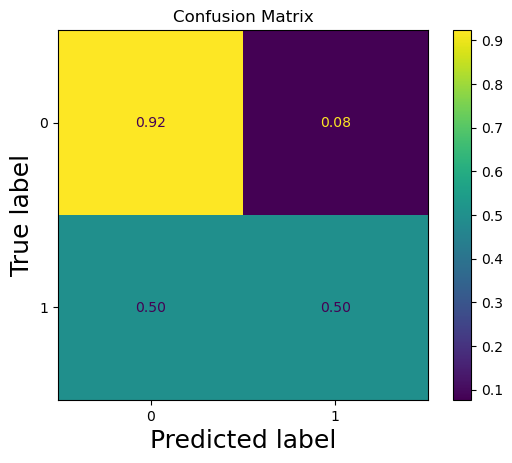

In [52]:
#Calculate the accuracy and prediction of the model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

xgboost_model_predicted = xg_model.predict(x_val)
score = accuracy_score(y_val, xgboost_model_predicted)
print("Error rate for XGBClassifier model is: ", 1 - score)

#Calculate confusion matrix
cm = confusion_matrix(y_val, xgboost_model_predicted, normalize = 'true')
print("Confusion Matrix")
print(cm)

#Plot confusion matrix as a heatmap
disp  = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = np.unique(y_val))
disp.plot(cmap = 'viridis', values_format = '.2f')
plt.title("Confusion Matrix")
plt.show()

In [53]:
#Get the predicted result for the test data
test.bank_account = xg_model.predict(processed_test)

In [61]:
#Create submission DataFrame
submission = pd.DataFrame({"uniqueid":test["uniqueid"] + "x" + test["country"], "bank_account": test.bank_account})

In [62]:
#show the five sample
submission.sample(15)

,uniqueid,bank_account
8167,uniqueid_8442xTanzania,0
9171,uniqueid_9446xTanzania,1
9638,uniqueid_2555xUganda,0
5636,uniqueid_11771xRwanda,0
9286,uniqueid_2203xUganda,0
7668,uniqueid_7943xTanzania,0
9283,uniqueid_2200xUganda,0
6052,uniqueid_12187xRwanda,0
7484,uniqueid_7759xTanzania,0
7513,uniqueid_7788xTanzania,0


In [63]:
#Create a submission file in jupyter notebook and download it
from IPython.display import FileLink
submission.to_csv('submission1.csv', index = False)

In [64]:
#Display a download link
FileLink('submission1.csv')

C:\Users\DIRECTOR\submission1.csv

In [77]:
#In case of excel file
from IPython.display import FileLink
submission.to_excel('submission2.xlsx', index = False)

In [78]:
#Display a download link
FileLink('submission2.xlsx')

C:\Users\DIRECTOR\submission2.xlsx